In [ ]:
# Hämtad från:
# https://cartographyvectors.com/map/1521-sweden-with-regions
# Välj format GeoJSON
#sweden_map = gpd.read_file('C:/Users/David/Documents/Anteckningar/Project in Data Science/Data/sweden-with-regions_.geojson')

In [18]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import matplotlib.pyplot as plt
from pyproj import CRS

# Load your CSV data and create a GeoDataFrame
df = pd.read_csv('Data/gbg_trajectories_2019_crossing.csv') #, nrows=10000
# filtered_df['geometry'] = filtered_df['line'].apply(lambda x: wkt.loads(x))
# gdf = gpd.GeoDataFrame(filtered_df, geometry='geometry')

# # Define the current CRS of your linestring data (replace 'EPSG:XXXX' with your actual CRS)
# # If you don't know the CRS, you can use the best guess, which is likely WGS 84 (EPSG:4326)
# source_crs = CRS.from_epsg(3006)

# # Set the CRS of the GeoDataFrame to match your linestring data
# gdf.crs = source_crs

# # Define the target CRS (WGS 84)
# target_crs = CRS.from_epsg(4326)

# # Reproject the GeoDataFrame to the target CRS
# gdf = gdf.to_crs(target_crs)
df.shape

(2521943, 8)

In [19]:
from shapely.wkt import loads
from shapely.geometry import LineString
from shapely.geometry import box

#tingstadstunneln
# start_lat = 320685
# start_long = 6401583
# stop_lat = 320431
# stop_long = 6401919

# E6 efter angeredsbron
# 322169
# 6411344
# 322081
# 6412907

# Define the road section as a LineString (adjust coordinates as needed)

# E6 efter angrered
#road_section = LineString([(322169, 6411344), (322081, 6412907)])

# Tingstadstunneln
road_section = LineString([(320685, 6401583), (320431, 6401919)])




# Convert the road_section to a Shapely LineString object
road_section_line = road_section

# Define the buffer distance (adjust as needed)
buffer_distance = 10.0  # Adjust the buffer distance as needed (in the same units as your coordinates)

# Create a buffered polygon around the road section
buffered_road_section = road_section.buffer(buffer_distance)

def count_cars_passing(trajectory, buffered_road_section):
    try:
        # Convert the trajectory to a Shapely LineString object
        trajectory_line = loads(trajectory)
        
        # Check if the trajectory intersects the buffered road section
        if trajectory_line.intersects(buffered_road_section):
            return 1  # This trajectory intersects the buffered road section
        else:
            return 0  # This trajectory does not intersect the buffered road section
    except:
        pass

df['passes_road_section'] = df['line'].apply(count_cars_passing, buffered_road_section=buffered_road_section)

# Count the total number of cars passing through the buffered road section
total_cars_passing = df['passes_road_section'].sum()
print(f"Total number of cars passing through the buffered road section: {total_cars_passing}")


Total number of cars passing through the buffered road section: 4999


In [20]:
df = df[df["passes_road_section"] == 1]

In [24]:
df['start_time'] = df['start_time'].str.rsplit('+', 1).str[0]
df['start_time'] = pd.to_datetime(df['start_time']).dt.date


C:\Users\Timze\AppData\Local\Temp\ipykernel_9504\1415645283.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df['start_time'] = df['start_time'].str.rsplit('+', 1).str[0]


In [ ]:

df['start_time'] = df['start_time'].apply(lambda x: pd.to_datetime(x, errors='coerce'))

# Identify indices where the conversion failed
failed_indices = []
for idx, value in enumerate(df['start_time']):
    if pd.isnull(value):
        failed_indices.append(idx)

In [ ]:
import numpy as np
np.dtype(df.start_time[934])

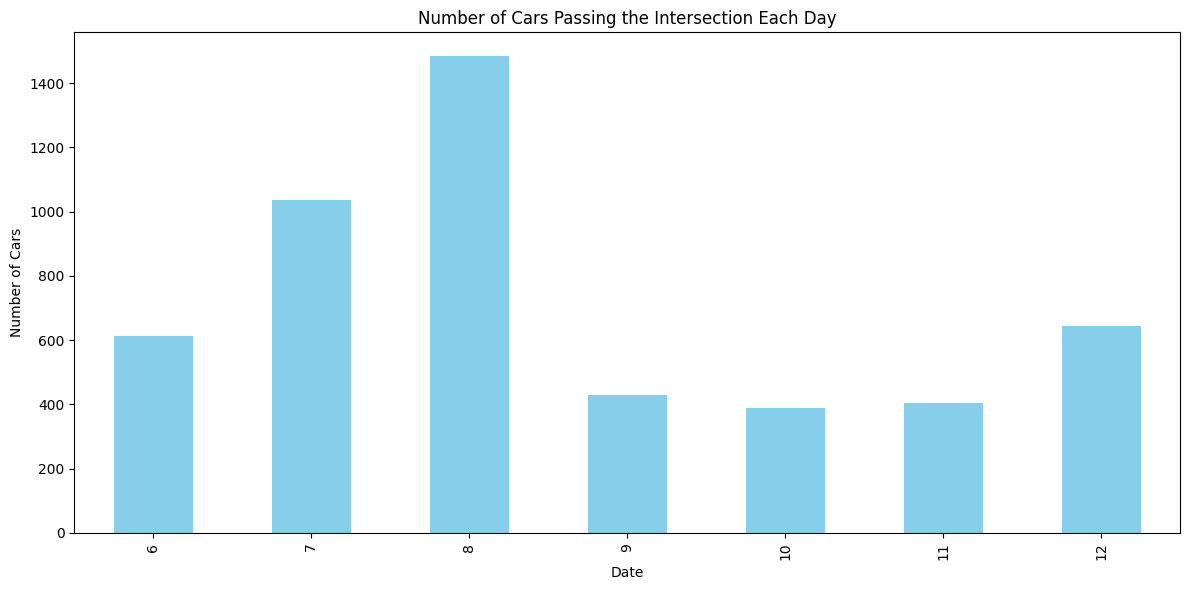

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and 'start_time' column needs to be converted to datetime
# df['start_time'] = pd.to_datetime(df['start_time'])

# Drop rows with missing start_time values
#df = df.dropna(subset=['start_time'])

# Group by date and sum the passes_road_section for each date
daily_car_count = df.groupby(df['start_time'].dt.isocalendar().day)["passes_road_section"].sum()

weekly_car_count = df.groupby(df['start_time'].dt.isocalendar().week)["passes_road_section"].sum()
monthly_car_count = df.groupby(df['start_time'].dt.month)["passes_road_section"].sum()


# Plot the data
plt.figure(figsize=(12, 6))
monthly_car_count.plot(kind='bar', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of Cars')
plt.title('Number of Cars Passing the Intersection Each Day')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
passing_car_indices = df[df['passes_road_section'] == 1].index

# Print the indices
print("Indices of rows with passing cars:")
print(passing_car_indices)